In [387]:
import pandas as pd
import math
import numpy as np
import pylab
from scipy.optimize import curve_fit
from matplotlib import pyplot as plt
from scipy.stats import chisquare
import scipy
plt.rcParams['figure.dpi'] = 200

0.004284388376947025 0.0011936620731892152
Max B 1.690175745769983 min -1.7901757457699832 s_B 0.004284388376947025


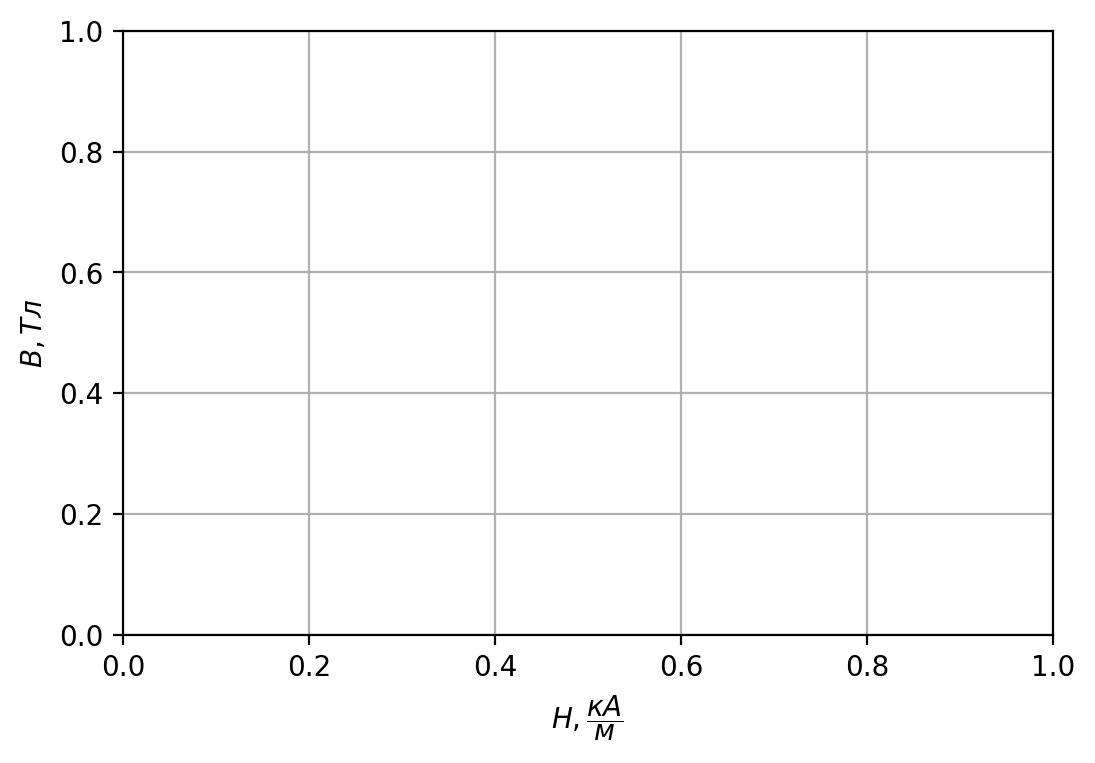

In [503]:
N_T0 = 750
D = 0.1 #m
d_c = 7 * 1e-2 #m
d_T = 1 * 1e-2 #m
N_C0 = 825
N_T1 = 300
l_c = 80 * 1e-2 #m
N_C1 = 435
delta_x1 = 94 #mm
mu_0 = 1.25663706 * 1e-6
delta_I1 = 1458 * 1e-3 #A


#errors
sigma_H = N_T0 * 0.5 / (np.pi * D) / 1e6 #kA/m
sigma_B = ( mu_0 * (d_c/d_T)**2 * (N_C0/N_T1) * (N_C1/l_c) * 1 / delta_x1 * delta_I1) #T
sigma_B *= 3
print(sigma_B, sigma_H)


#first circuit
B_current = 0

result_H = np.array([], dtype=np.float64)
result_B = np.array([], dtype=np.float64)



delta_x = np.array([167, 126, 119, 65, 35, 19, 19, 12, 20, 23, 45], dtype=np.float64) #mm
sigma_x = [0] * 11
sigma_x[0] = 2
for i in range(1, len(sigma_x)):
    sigma_x[i] = sigma_x[i - 1] + 2
I = np.array([1467, 514.8, 250.7, 157.5, 95.3, 66.8, 56.1, 44.6, 39.2, 28.1, 15.4, 0.1], dtype=np.float64) #mA
H = N_T0 * I / (np.pi * D) / 1e6 #kA/m
delta_B = ( mu_0 * (d_c/d_T)**2 * (N_C0/N_T1) * (N_C1/l_c) * delta_x / delta_x1 * delta_I1)
B = np.array([0]*(len(delta_x) + 1), dtype=np.float64)
B[0] = 0
B_current = B[0]
for i in range(len(delta_x)):
    B[i + 1] = B[i] + delta_B[i]
    B_current += delta_B[i]
result_H = np.concatenate((result_H, H))
result_B = np.concatenate((result_B, B))
#plt.plot(H, B, 'o')
plt.grid()
plt.xlabel(r'$H, \dfrac{кА}{м}$')
plt.ylabel(r'$B, Тл$')



delta_x = np.array([69, 86, 201, 145, 236, 120, 212, 216, 149, 186, 167], dtype=np.float64) #mm
I = np.array([0.1, 15.4, 28.1, 39.2, 44.6, 56.1, 66.8, 95.2, 157.3, 250.7, 514.1, 1462.1], dtype=np.float64) #mA
H = N_T0 * I / (np.pi * D) / 1e6 #kA/m
delta_B = ( mu_0 * (d_c/d_T)**2 * (N_C0/N_T1) * (N_C1/l_c) * delta_x / delta_x1 * delta_I1)
B = np.array([0]*(len(delta_x)+1), dtype=np.float64)
B[0] = 0
for i in range(len(delta_x)):
    B[i + 1] = B[i] + delta_B[i]
result_H = np.concatenate((result_H, -H))
result_B = np.concatenate((result_B, B + B_current))
B_current += B[len(B) - 1]



delta_x = np.array([164, 124, 91, 71, 50, 18, 20, 13, 22, 27, 48], dtype=np.float64) #mm
I = np.array([1462.1, 514.8, 250.9, 157.5, 95.3, 66.9, 56.2, 44.5, 39.2, 28.1, 15.4, 0.1], dtype=np.float64) #mA
H = N_T0 * I / (np.pi * D) / 1e6 #kA/m
delta_B = ( mu_0 * (d_c/d_T)**2 * (N_C0/N_T1) * (N_C1/l_c) * delta_x / delta_x1 * delta_I1)
B = np.array([0]*(len(delta_x)+1), dtype=np.float64)
B[0] = 0
for i in range(len(delta_x)):
    B[i + 1] = B[i] + delta_B[i]
#plt.plot(-H, B_current-B, 'o')
result_H = np.concatenate((result_H, -H))
result_B = np.concatenate((result_B, -B + B_current))
B_current -= B[len(B) - 1]


delta_x = np.array([70, 85, 201, 146, 234, 121, 209, 212, 151, 186, 167], dtype=np.float64) #mm
I = np.array([0.1, 15.4, 28.1, 39.2, 44.6, 56.1, 66.9, 95.3, 157.3, 250.7, 514.2, 1462.1], dtype=np.float64) #mA
H = N_T0 * I / (np.pi * D) / 1e6 #kA/m
delta_B = ( mu_0 * (d_c/d_T)**2 * (N_C0/N_T1) * (N_C1/l_c) * delta_x / delta_x1 * delta_I1)
B = np.array([0]*(len(delta_x) + 1), dtype=np.float64)
B[0] = 0
for i in range(len(delta_x)):
    B[i + 1] = B[i] + delta_B[i]
#plt.plot(H, B_current-B, 'o')
result_H = np.concatenate((result_H, H))
result_B = np.concatenate((result_B, -B + B_current))
B_current += B[len(B) - 1]


H_c = []
B_max = max(result_B)
result_B -= B_max/2
result_H = -result_H
result_B -= 0.05
print('Max B', max(result_B), 'min', min(result_B), 's_B', sigma_B)
#plt.plot(result_H, result_B, 'o', markersize=2, label='петля гистерезиса')     





def arctan(arr, p_1, p_2, p_3, p_4):
    return p_1 * np.arctan(p_2 * (arr + p_4))  + p_3 * (arr+p_4) 

def arctan_228(arr, p_1, p_2, p_3, p_4):
    return - (p_1 * np.arctan(p_2 * (-arr + p_4))  + p_3 * (-arr+p_4) )

def langeven(arr, p_1, p_2, p_3, p_4):
    return p_1 * (1 /(np.tanh((arr + p_4)/p_2)) - p_2/(arr + p_4))

def reley(arr, p_1, p_2):
    return (p_1 + p_2* 8.3)*arr + p_2/2 * (arr**2 - 8.3**2)

def sigmoid(arr, p_1, p_2, p_3):
    return ( 2 * p_1 / (1 + np.exp(-arr *np.abs(p_2) + p_3)) - p_1 )



#second circuit

delta_x = np.array([26, 43, 88, 50, 100, 65, 147, 186, 146, 184, 168], dtype=np.float64) #mm
I = np.array([0.1, 15.4, 28.1, 39.2, 44.5, 56.1, 66.8, 95.3, 157.3, 250.6, 514.0, 1462.1], dtype=np.float64) #mA
H = N_T0 * I / (np.pi * D) / 1e6 #kA/m
delta_B = ( mu_0 * (d_c/d_T)**2 * (N_C0/N_T1) * (N_C1/l_c) * delta_x / delta_x1 * delta_I1)
B = np.array([0]*(len(delta_x) + 1), dtype=np.float64)
B[0] = 0
for i in range(len(delta_x)):
    B[i + 1] = B[i] + delta_B[i]

#plt.plot(H, B, 'o', markersize=2, label='начальная кривая')
#popt, pcov = curve_fit(arctan, H, -B)
#plt.plot(np.linspace(0, H[-1]), arctan(np.linspace(0, H[-1]), *popt), '--', markersize=2)

#plt.text(-7.5, -0.2, r'$H_c = 0.28 \pm 0.03\; \dfrac{кА}{м}$'+'\n'+r'$B_S = 1.740 \pm 0.001 \,Тл$' + '\n'+r'$\mu_{диф} = (5.5 \pm 0.5) * 10^3$')

#print(popt, np.sqrt(pcov[0][0]), np.sqrt(pcov[1][1]), np.sqrt(pcov[2][2]))

#plt.text(2, 0.2, r'$B = p_1arctg(p_2H)+p_3H$')


mu_diff 2319.8804786681226 +_ 343.56198370596036
epsilon_mu_diff 0.14809469145721005
1.069964061885513 +_ 0.07725822676291304
3.689725803460882 +_ 0.4925059139447053
0.034240329549424756 +_ 0.037576681760738986
-0.0231723420556768 +_ 0.007237787151783537


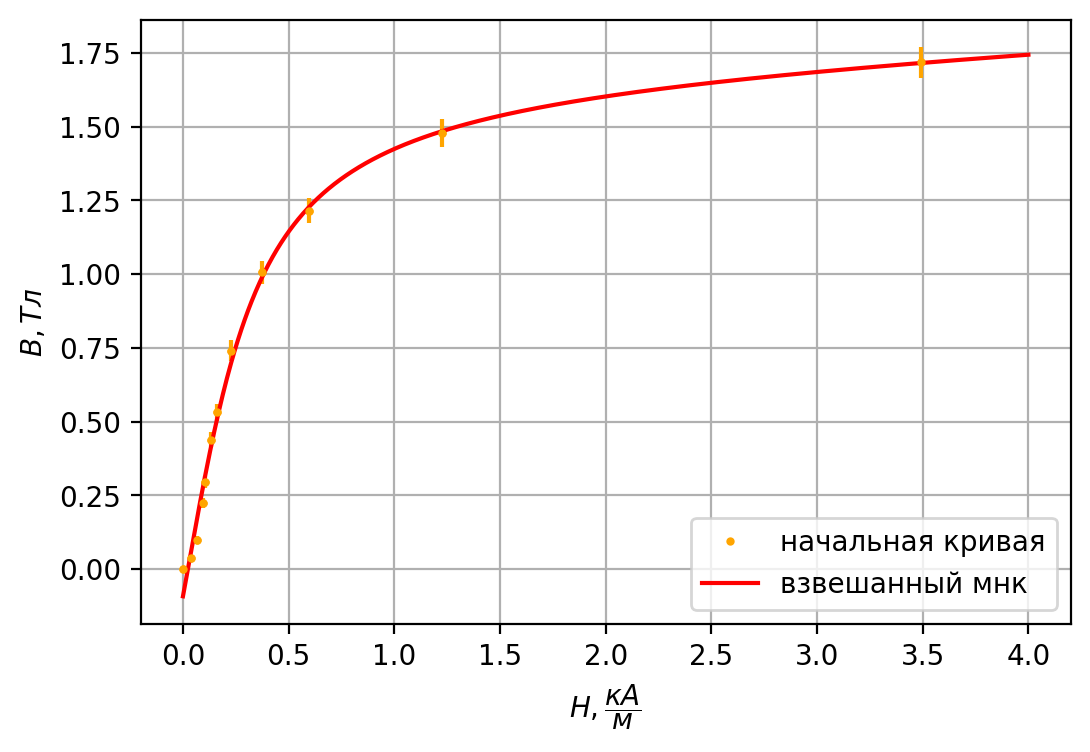

In [529]:
plt.plot(H, B, 'o', label='начальная кривая', markersize=2, color='orange')
plt.xlabel(r'$H, \dfrac{кА}{м}$')
plt.ylabel(r'$B, Тл$')
plt.grid()

print('mu_diff', (popt[0] * popt[1] + popt[2])/(mu_0 * 1e3), '+_', (np.sqrt(pcov[0][0])/popt[0] + np.sqrt(pcov[1][1])/popt[1]) * (popt[0] * popt[1] + popt[2])/(mu_0 * 1e3))
print('epsilon_mu_diff', np.sqrt(pcov[0][0])/popt[0] + np.sqrt(pcov[1][1])/popt[1])


B_error = [0] * len(B)
B_error[0] = 3
for i in range(1, len(B)):
    B_error[i] = B_error[i - 1] + 3
for i in range(len(B)):
    B_error[i] *= ( mu_0 * (d_c/d_T)**2 * (N_C0/N_T1) * (N_C1/l_c) * 1 / delta_x1 * delta_I1)
    
plt.errorbar(H, B, yerr=B_error, fmt='o', markersize=2, color='orange')

popt, pcov = curve_fit(arctan, H[:], B[:])
plt.plot(np.linspace(0, 4, 1000), arctan(np.linspace(0, 4, 1000), *popt), color='red', label='взвешанный мнк')

plt.legend()
plt.savefig('starting_curve.png')
for i in range(4):
    print(popt[i], '+_', np.sqrt(pcov[i][i]))

0.8877195742019551 +_ 0.010902797080704652
0.7166808246344961 +_ 0.038232550805938834
0.009175382152997017 +_ 0.00045992799393390973
-1.254717241764064 +_ 0.046065761508904096
B_staurated 1.690175745769983
Sigma_B 0.004284388376947025
H_c -125.4717241764064 +_ 4.725942358209331 A/m
B_r -0.6616699043915087


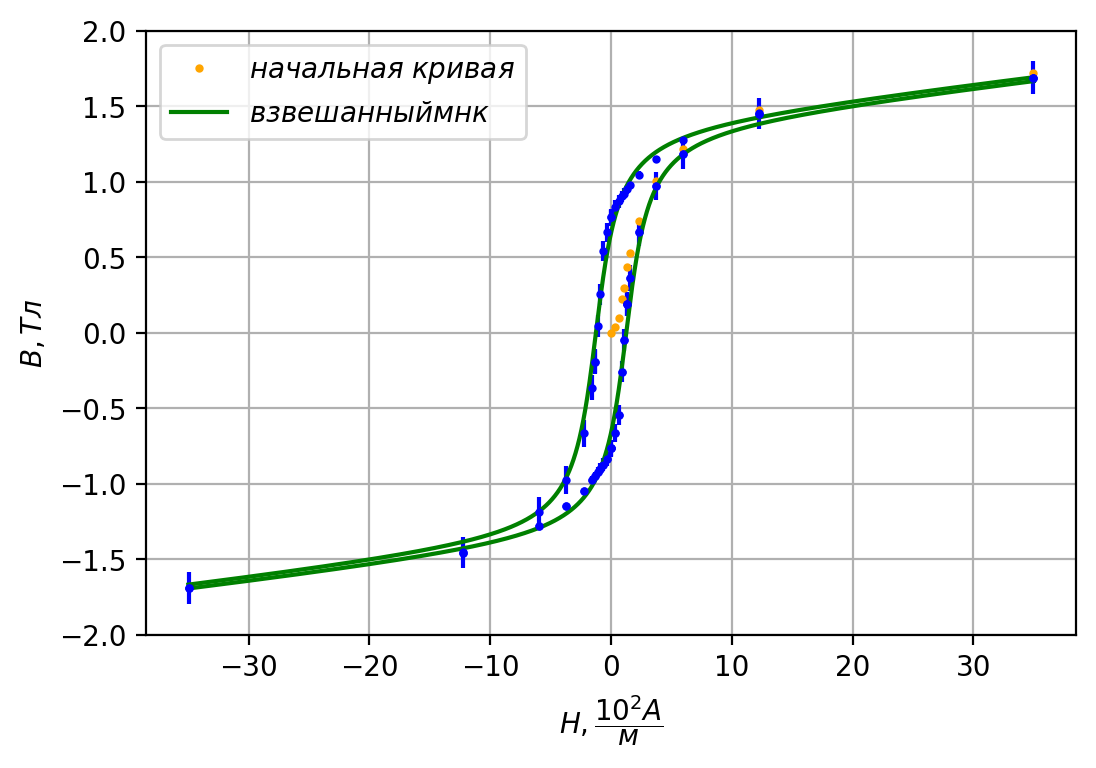

In [522]:
H_up = []
B_up = []

for i in range(len(result_B)):
    if result_B[i] > 0:
        B_up.append(result_B[i])
        H_up.append(result_H[i])
for i in range(len(H_up)):
    H_up.append(-H_up[i])
    B_up.append(-B_up[i])

plt.grid()
add = H_up[8:24]
H_right = list(H_up[:7])
for i in range(len(add)):
    H_right.append(-add[i])
B_right = B_up[:7]
add = B_up[8:24]
for i in range(len(add)):
    B_right.append(-add[i])
'''for i in H_up[int(len(H_up)/2):]:
    H_right.append(-i)
for i in B_up[int(len(H_up)/2):]:
    B_right.append(-i)'''

H_left = H_up[7:25]
B_left = B_up[7:25]
add = H_up[:7]
for i in range(len(add)):
    H_left.append(-add[i])
add = B_up[:7]
for i in range(len(add)):
    B_left.append(-add[i])


for i in range(len(H_left)):
    H_left[i] *= 10
for i in range(len(H_right)):
    H_right[i] *= 10 


H_final = H_left + H_right
B_final = B_left + B_right

#plt.plot(H_final, B_final, 'o', markersize=2, label=r'$петля$')

for i in range(4):
    print(popt[i], '+_', np.sqrt(pcov[i][i]))

print('B_staurated', max(B_final))
print('Sigma_B', sigma_B)
print('H_c', popt[3] * 1e2, '+_', np.sqrt(pcov[3][3])*1e2 + sigma_H * 1e2, 'A/m')
print('B_r', popt[0]*np.arctan(popt[1]*popt[3]) + popt[2]*popt[3])

#second fit

plt.xlabel(r'$H, \dfrac{10^2А}{м}$')
plt.ylabel(r'$B, Тл$')

plt.plot(H * 10, B, 'o', markersize=2, label=r'$начальная\; кривая$', color = 'orange')

#errorbar

error_B = [0.0] * len(B_left)
error_B[0] = 3
for i in range(1, len(B_left)):
    error_B[i] = error_B[i - 1] + 3
for i in range(len(B_left)):
    error_B[i] *= ( mu_0 * (d_c/d_T)**2 * (N_C0/N_T1) * (N_C1/l_c) * 1 / delta_x1 * delta_I1)
plt.errorbar(H_left, B_left, yerr=error_B, fmt='o', markersize=2, color='blue')
popt, pcov = curve_fit(arctan, H_left, B_left, sigma=error_B, absolute_sigma=True)
plt.plot(np.linspace(-35, 35, 10000), arctan(np.linspace(-35, 35, 10000), *popt), color='green', label=r'$мнк$')

H_right = []
for i in H_left:
    H_right.append(-i)
B_right = []
for i in B_left:
    B_right.append(-i)

plt.plot(H_right, B_right, 'o', color='blue', markersize=2)
plt.errorbar(H_right, B_right, yerr=error_B, fmt='o', markersize=2, color='blue')
popt, pcov = curve_fit(arctan, H_right, B_right, sigma=error_B, absolute_sigma=True)
plt.plot(np.linspace(-35, 35, 10000), arctan(np.linspace(-35, 35, 10000), *popt), color='green')


#legend...
plt.legend() 

plt.ylim(-2, 2)
plt.savefig('gisterezis.png')


In [ ]:
for i in range(len(H_right) - 1):
    if H_right[i] > H_right[i - 1]:
        c = H_right[i]
        H_right[i] = H_right[i - 1]
        H_right[i - 1] = c

In [ ]:
for i in range(len(H_left)):
    H_left[i] *= 10
for i in range(len(H_right)):
    H_right[i] *= 10 